   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Dataset Preview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3  

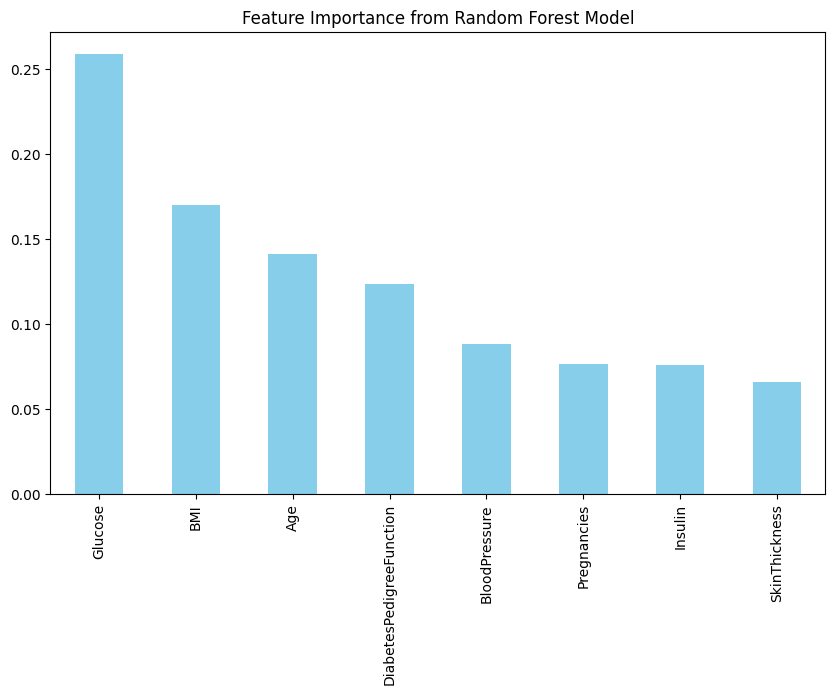

Model saved successfully!


In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
import pandas as pd

file_path = "diabetes.csv"  # File is in the same directory
data = pd.read_csv(file_path)
print(data.head())  # Just to verify it's loaded


# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())

# Features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Data scaling for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

# Feature importance analysis
feature_importances = pd.Series(model.feature_importances_, index=data.columns[:-1]).sort_values(ascending=False)
print("\nFeature Importances:")
print(feature_importances)

# Visualizing feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.title('Feature Importance from Random Forest Model')
plt.show()

import pickle

# Save the trained model to a file
with open('diseases2.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully!")

